In [ ]:

from google.colab import drive
drive.mount('/content/drive',force_remount=True)
import tensorflow as tf
tf.test.gpu_device_name()

Mounted at /content/drive


'/device:GPU:0'

In [ ]:
#import packages

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sn
%matplotlib inline
import re
import sys
import warnings
import pandas as pd
import numpy as np
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import joblib

In [ ]:
#needed for DNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
from keras.layers import Dropout
from keras.optimizers import Adam,RMSprop
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from sklearn import preprocessing
from keras import layers
from tensorflow.keras.layers import LSTM,GRU,Bidirectional
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/dataset/bangla_comments_tokenized.csv', encoding='utf-8')
df.head()


,label,text,clean_text,tokenized_clean_text,tokenized_stem_text,token_length
0,Political,ছালা পাকিস্তানী বাশ দিয়া দাও ভর দিয়া হাটবো অভা...,ছালা পাকিস্তানীদের বাশ দিয়া দাও ভর দিয়া হাটবো ...,"['ছালা', 'পাকিস্তানীদের', 'বাশ', 'দিয়া', 'দাও'...","['ছালা', 'পাকিস্তানী', 'বাশ', 'দিয়া', 'দাও', '...",13
1,religious,ফ্যামিলিটা নাস্তিক থক আশা কর যায় না ফাউল,ফ্যামিলিটাই নাস্তিক থকে আশা করা যায় না ফাউল,"['ফ্যামিলিটাই', 'নাস্তিক', 'থকে', 'আশা', 'করা'...","['ফ্যামিলিটা', 'নাস্তিক', 'থক', 'আশা', 'কর', '...",8
2,sexual,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপ...,"['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...","['তুই', 'মাগি', 'মাফ', 'তুই', 'আখিরাত', 'বিশ্ব...",19
3,religious,সাফা কবির কঠিনফ্ ছিল তো চরমঘৃনা করি তুই নাস্তি...,সাফা কবির কঠিনফ্ ছিলাম তো চরমঘৃনা করি তুই নাস্...,"['সাফা', 'কবির', 'কঠিনফ্', 'ছিলাম', 'তো', 'চরম...","['সাফা', 'কবির', 'কঠিনফ্', 'ছিল', 'তো', 'চরমঘৃ...",14
4,not bully,সুপ সুপ হিরো,সুপার সুপার হিরো,"['সুপার', 'সুপার', 'হিরো']","['সুপ', 'সুপ', 'হিরো']",3


In [ ]:
df.label.value_counts()

Political    11000
not bully    11000
sexual       11000
religious     9036
Name: label, dtype: int64

In [ ]:
df['label'] = df['label'].replace({'not bully':'acceptable'})

In [ ]:
# label encoding for output

sample_data = [2000,5000,10000,20000,30000,40000]

def label_encoding(category,bool):
  le = preprocessing.LabelEncoder()
  le.fit(category)
  encoded_labels = le.transform(category)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print("\n\t\t\t Label Encoding ","\nClass Names:-->",le.classes_)
    for i in sample_data:
      print(category[i],' ', encoded_labels[i],'\n')
    return labels

labels = label_encoding(df.label,True)


			 Label Encoding  
Class Names:--> ['Political' 'acceptable' 'religious' 'sexual']
acceptable   1 

acceptable   1 

religious   2 

Political   0 

acceptable   1 

religious   2 



In [ ]:
#split the data in train, validation, test

def dataset_split(headlines,category):

    X,X_test,y,y_test = train_test_split(headlines,category,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,
                                                  test_size = 0.1,random_state =0)
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(headlines),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))
  
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [ ]:
df.clean_text=df.clean_text.astype(str)

X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(df.clean_text,labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 42036 
	Training		 34048 
	Test			 4204 
	Validation		 3784


In [ ]:
#define perameters for GRU and padding and tokenization
vocab_size =50000
embedding_dim = 64
max_length = 60
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train.values)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train.values)
train_padded = pad_sequences(train_sequences,padding=padding_type, maxlen=max_length)

In [ ]:
#Tokenizer Info
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
#insightful info about tokens
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)

#Print all the information
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )    
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

Words --> Counts:
না 	 12519
নাস্তিক 	 4388
যে 	 3829
বিশ্বাস 	 3250
কথা 	 3187
আল্লাহ 	 3140
ও 	 3005
তুই 	 2846
একটা 	 2266
সাফা 	 1857

Words --> Documents:
না 	 8256
নাস্তিক 	 3763
যে 	 3081
কথা 	 2539
ও 	 2385
আল্লাহ 	 2267
একটা 	 2044
বিশ্বাস 	 2039
তুই 	 1913
করা 	 1562

Words --> Index:
connection 	 52572
সবচেয়ের 	 52571
short 	 52570
বেহাত 	 52569
মঙ্গলশূভযাএা 	 52568
শুরতে 	 52567
এমহামারী 	 52566
কসাইতো 	 52565
নির্ঘাত 	 52564
জন্মালে 	 52563

Total Documents --> 34048
Found 52572 unique tokens


In [ ]:
def padded_headlines(original,encoded,padded):
  print("\n\t\t\t Encoded Sequences ","\n")  
  print(original,"\n",encoded) 
  print("\n\t\t\t Paded Sequences \n",original,"\n",padded)

padded_headlines(X_train[2],train_sequences[2],train_padded[2])


			 Encoded Sequences  

তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপের চুদায় জন্ম নিছস তুই বাপের মার চুদা দেখ নাই 
 [40, 2081, 1580, 1106, 3136, 24416, 577, 120, 1734, 2457, 392, 8, 681, 1477, 729, 310, 6986, 2219, 3585, 6361, 6987, 5861, 774, 2220, 16007, 2708, 5862, 1477, 2708, 5428, 5863, 610, 729, 12554, 6362, 1083, 971, 12555, 24417, 5429, 24418, 877, 3020, 1003, 815, 4190, 6988, 4190, 5430, 2900, 1735, 1408]

			 Paded Sequences 
 তুই মাগি মাফ তুই আখিরাত বিশ্বাস করস না তুই বাপের চুদায় জন্ম নিছস তুই বাপের মার চুদা দেখ নাই 
 [   40  2081  1580  1106  3136 24416   577   120  1734  2457   392     8
   681  1477   729   310  6986  2219  3585  6361  6987  5861   774  2220
 16007  2708  5862  1477  2708  5428  5863   610   729 12554  6362  1083
   971 12555 24417  5429 24418   877  3020  1003   815  4190  6988  4190
  5430  2900  1735  1408     0     0     0     0     0     0     0     0]


In [ ]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid.values)
validation_padded = pad_sequences(validation_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_valid[38000],validation_sequences[38000],validation_padded[38000])


In [ ]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test.values)
test_padded = pad_sequences(test_sequences,padding=padding_type, maxlen=max_length)
#padded_headlines(X_test[35000],test_sequences[35000],test_padded[5000])


In [ ]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [ ]:
accuracy_threshold = 0.97
vocab_size = 50000
embedding_dim=64
max_length = 20
num_category = 4
opt=Adam(lr=0.008)
path="/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/"

In [ ]:
keras.backend.clear_session()
#callback function for early stopping
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()

**Bidirectional GRU**

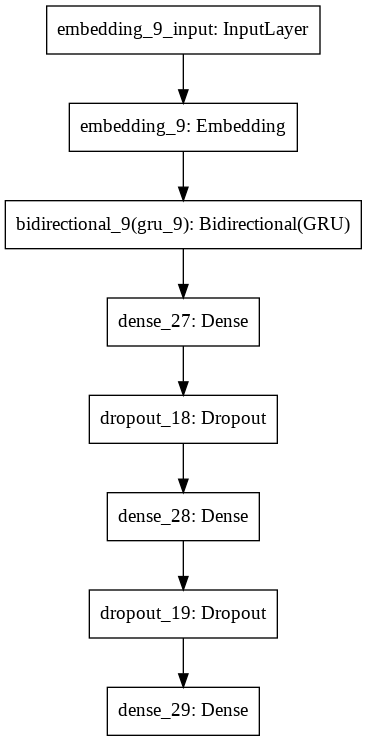

In [ ]:
# Saved the Best Model
#!pip install ann_visualizer
#from ann_visualizer.visualize import ann_viz
#from tf.keras.utils import plot_model

filepath = path+"BidGruModel.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 


BGRU_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(GRU(64,return_sequences=True,dropout=0.2)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

tf.keras.utils.plot_model(BGRU_model, to_file= path+'plot model/'+'BGRUmodel.png')


In [ ]:
BGRU_model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
BGRU_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 60, 64)            3200000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60, 128)           49920     
_________________________________________________________________
dense_6 (Dense)              (None, 60, 64)            8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 60, 64)            4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 60, 4)            

In [ ]:
num_epochs = 10
batch = 128

BGRU_model_history = BGRU_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)

Epoch 1/10
266/266 [==============================] - 27s 71ms/step - loss: 0.6839 - accuracy: 0.7338 - val_loss: 0.4631 - val_accuracy: 0.8319

Epoch 00001: val_accuracy improved from -inf to 0.83192, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 2/10
266/266 [==============================] - 18s 69ms/step - loss: 0.2947 - accuracy: 0.9019 - val_loss: 0.4674 - val_accuracy: 0.8401

Epoch 00002: val_accuracy improved from 0.83192 to 0.84012, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/BidGruModel.h5
Epoch 3/10
266/266 [==============================] - 18s 69ms/step - loss: 0.1310 - accuracy: 0.9577 - val_loss: 0.6267 - val_accuracy: 0.8356

Epoch 00003: val_accuracy did not improve from 0.84012
Epoch 4/10
266/266 [==============================] - 18s 67ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.7323 - val_accuracy: 0.8346

Reached 97.00% accur

In [ ]:
# Plot training results
def model_evaluate(history,directory,filename):
  H = history.history
  fig = plt.figure(figsize = (20, 7))
  plt.subplot(121)
  plt.plot(H['accuracy'], label = 'acc')
  plt.plot(H['val_accuracy'], label = 'val_acc')
  plt.grid()
  plt.legend()
  plt.subplot(122)
  plt.plot(H['loss'], label = 'loss')
  plt.plot(H['val_loss'], label = 'val_loss')
  plt.grid()
  plt.legend()
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")


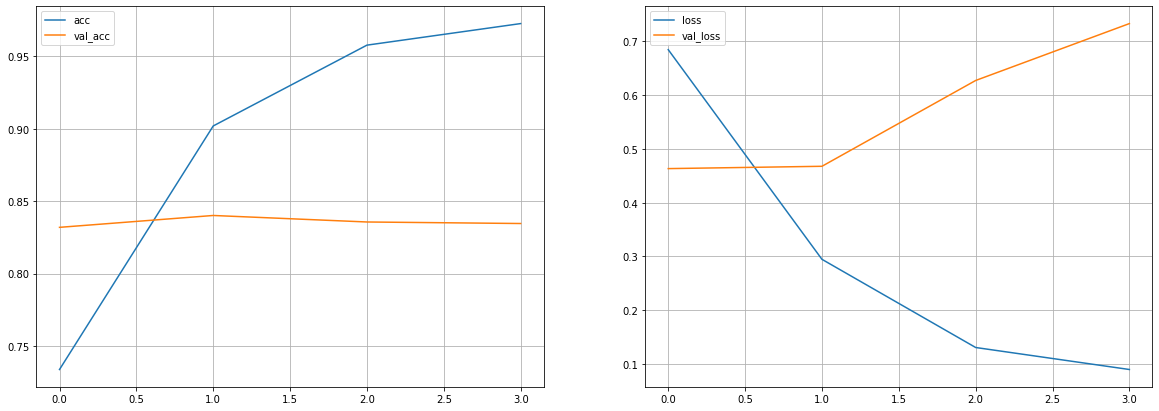

In [ ]:

model_evaluate(BGRU_model_history,"BiGru","Bi_Gru_evaluation")

In [ ]:
#confusion matrix
def conf_matrix(y_pred,classfier,directory,filename):

  cm = confusion_matrix(y_test, y_pred) 
# Transform to df for easier plotting
  
  cm_df = pd.DataFrame(cm,
                       index = ['Political', 'acceptable', 'religious', 'sexual'], 
                       columns = ['Political', 'acceptable', 'religious', 'sexual'])
  plt.figure(figsize=(8,6))
  sn.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
  plt.title('\n'+classfier+'Accuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.xticks(rotation = 45)
  plt.yticks(rotation = 45)
  plt.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  plt.show()
  plt.close()

In [ ]:
#Report generation

def report_generate(pred,classfier,directory,filename):
  report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = pred, output_dict=True)).transpose()
  report = report.rename(index={'0': 'Political','1':'acceptable','2':'religious','3':'sexual'})
  report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
  report=report.drop(["support"],axis=1)
  columns = ['precision','recall','f1-score']
  report.columns = columns
  plt = report.plot(kind='bar',figsize=(12,6))
  
  plot=plt.tick_params(rotation=40)
  plt.figure.savefig("/content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/visualization/result_analysis/"+directory+"/"+filename+".png")
  
  return plot,report

In [ ]:
#make predictions

model = load_model(path+"BidGruModel.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)


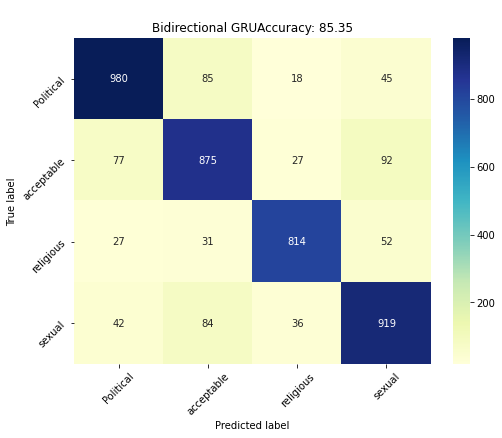

In [ ]:
conf_matrix(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_confusion_matrix")

,precision,recall,f1-score
Political,87.03,86.88,86.96
acceptable,81.40,81.70,81.55
religious,90.95,88.10,89.50
sexual,82.94,85.01,83.97
accuracy,85.35,85.35,85.35
macro avg,85.58,85.42,85.49
weighted avg,85.41,85.35,85.37


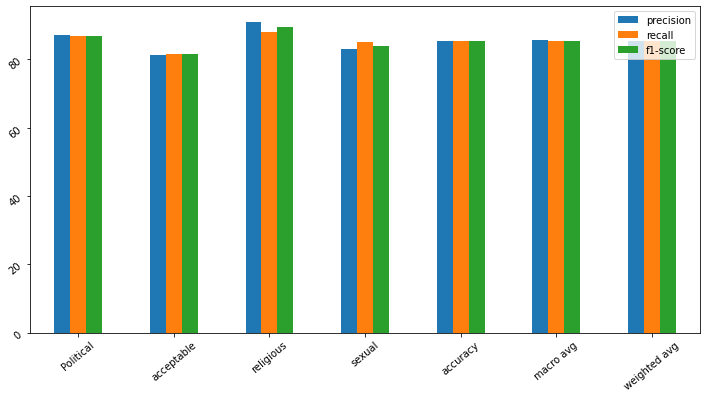

In [ ]:
GRUreport=report_generate(y_pred,"Bidirectional GRU","BiGru","Bi_Gru_report")
GRUreport[1]

**RNN**

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 60, 128)           6400000   
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 60, 256)           263168    
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 4)                 516       
Total params: 6,844,548
Trainable params: 6,844,548
Non-trainable params: 0
___________________________________________

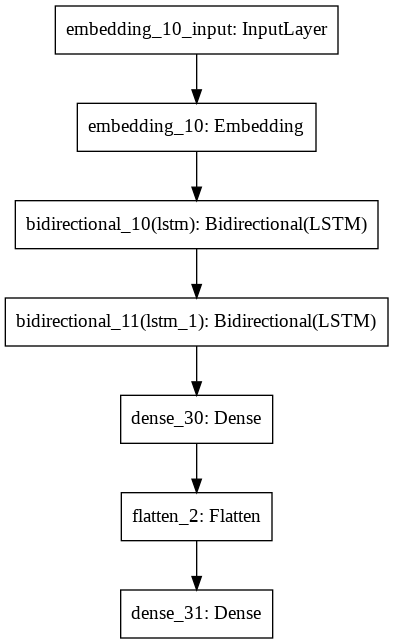

In [ ]:
embedding_dim=128
filepath = path+"RNN.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

RNN_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]),
    tf.keras.layers.Bidirectional(LSTM(128,dropout = 0.2, recurrent_dropout = 0.2,return_sequences=True)),
    tf.keras.layers.Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

RNN_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(RNN_model.summary())
tf.keras.utils.plot_model(RNN_model, to_file= path+'plot model/'+'RNNmodel.png')

In [ ]:
num_epochs = 10
batch = 128

RNN_history = RNN_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)



Epoch 1/10
266/266 [==============================] - 155s 554ms/step - loss: 0.7452 - accuracy: 0.7057 - val_loss: 0.5293 - val_accuracy: 0.8029

Epoch 00001: val_accuracy improved from -inf to 0.80285, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 2/10
266/266 [==============================] - 145s 546ms/step - loss: 0.3795 - accuracy: 0.8675 - val_loss: 0.4461 - val_accuracy: 0.8401

Epoch 00002: val_accuracy improved from 0.80285 to 0.84012, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 3/10
266/266 [==============================] - 146s 549ms/step - loss: 0.2653 - accuracy: 0.9118 - val_loss: 0.4291 - val_accuracy: 0.8544

Epoch 00003: val_accuracy improved from 0.84012 to 0.85439, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/RNN.h5
Epoch 4/10
266/266 [==============================] - 144s 543ms

In [ ]:
#make predictions

RNN_model = load_model(path+"RNN.h5")
RNN_predictions = RNN_model.predict(test_padded)
y_pred = np.argmax(RNN_predictions, axis=1)

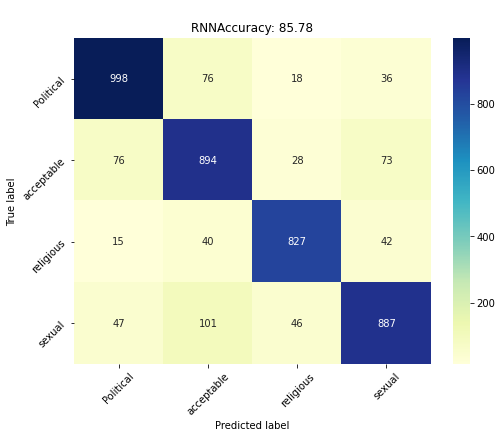

In [ ]:
conf_matrix(y_pred,"RNN","RNN","RNN_confusion_matrix")

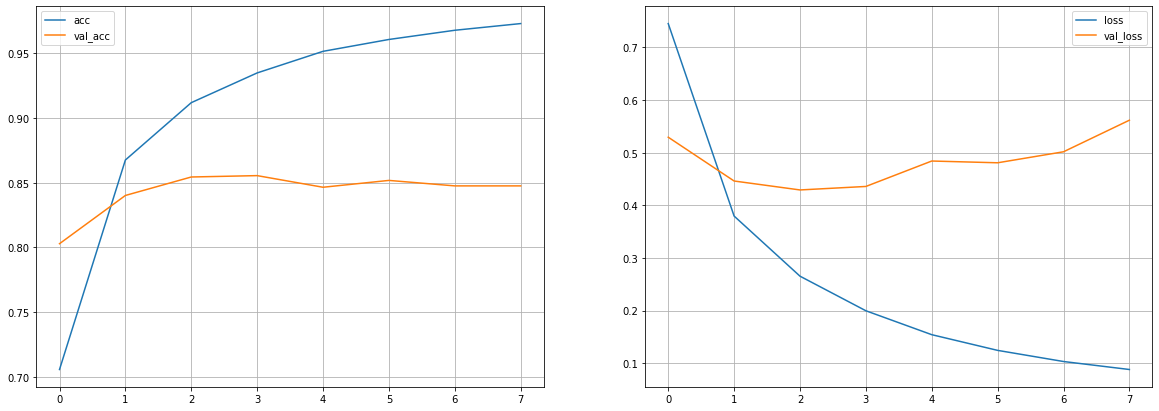

In [ ]:
# Plot training results
model_evaluate(RNN_history,"RNN","RNN_evaluation")


**LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
filepath = path+"LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 

embedding_dim=100
LSTM_model = Sequential()
LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
LSTM_model.add(SpatialDropout1D(0.2))
LSTM_model.add(LSTM(64,return_sequences=True, recurrent_dropout=0.5))
LSTM_model.add(LSTM(64,return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
LSTM_model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1))
LSTM_model.add(Dense(28, activation="relu"))
LSTM_model.add(Dense(num_category, activation='softmax'))
#keras.utils.plot_model(LSTM_model, to_file= path+'plot model/'+'LSTMmodel.png')


In [ ]:
LSTM_model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print(LSTM_model.summary())


In [ ]:
num_epochs = 20
batch = 128

LSTM_history = LSTM_model.fit(train_padded, train_label_seq, 
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq), 
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/20
266/266 [==============================] - 141s 414ms/step - loss: 1.2883 - accuracy: 0.3405 - val_loss: 0.9161 - val_accuracy: 0.5584

Epoch 00001: val_accuracy improved from -inf to 0.55840, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 2/20
266/266 [==============================] - 107s 403ms/step - loss: 0.8607 - accuracy: 0.6024 - val_loss: 0.7967 - val_accuracy: 0.7045

Epoch 00002: val_accuracy improved from 0.55840 to 0.70455, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 3/20
266/266 [==============================] - 108s 406ms/step - loss: 0.6412 - accuracy: 0.7782 - val_loss: 0.6911 - val_accuracy: 0.7719

Epoch 00003: val_accuracy improved from 0.70455 to 0.77193, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/LSTM.h5
Epoch 4/20
266/266 [==============================] - 108s 40

In [ ]:
#make predictions

LSTM_model = load_model(path+"LSTM.h5")
predictions = LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

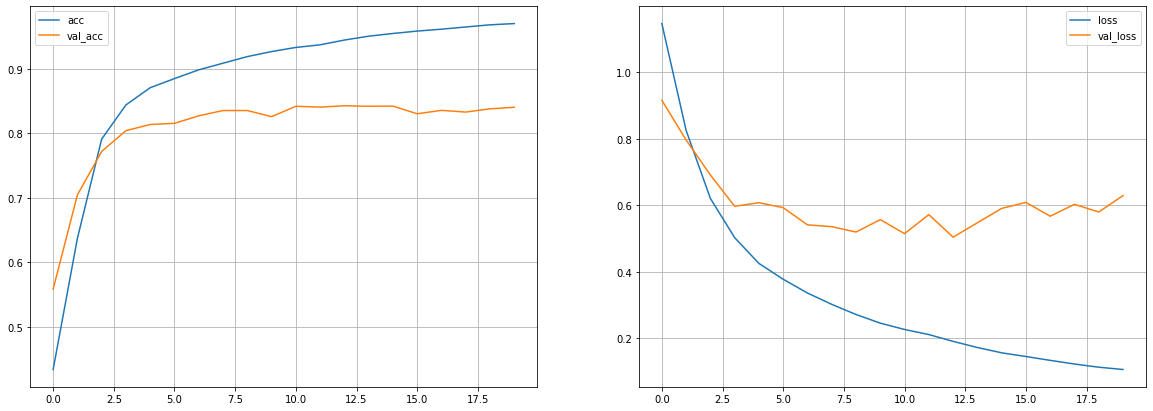

In [ ]:
# Plot training results
model_evaluate(LSTM_history,"LSTM","LSTM_evaluation")


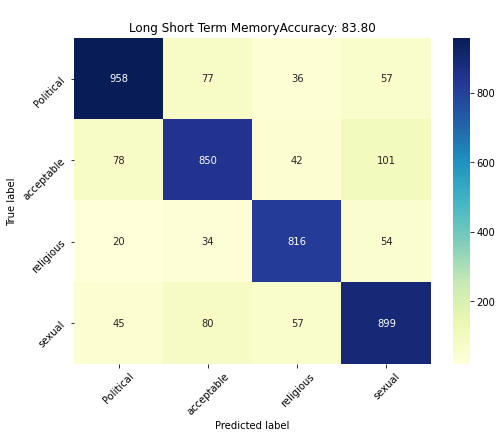

In [ ]:
conf_matrix(y_pred,"Long Short Term Memory","LSTM","LSTM_confusion_matrix")

,precision,recall,f1-score
Political,87.01,84.93,85.96
acceptable,81.65,79.37,80.49
religious,85.80,88.31,87.04
sexual,80.92,83.16,82.03
accuracy,83.80,83.80,83.80
macro avg,83.85,83.94,83.88
weighted avg,83.81,83.80,83.79


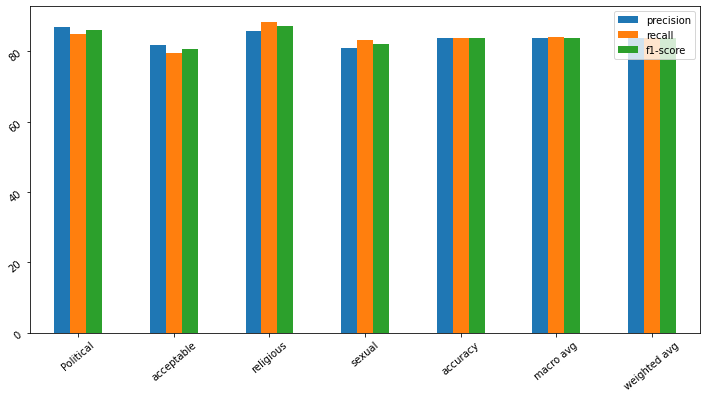

In [ ]:
LSTMreport=report_generate(y_pred,"Long Short Term Memory","LSTM","LSTM_report")
LSTMreport[1]

In [ ]:
#testing out
txt = ["এজন্য ভারত বাংলাদেশে এসে হোয়াইট ওয়াস হয়েগেছে মনে নেই"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = LSTM_model.predict(padded)

labels = ['Political', 'acceptable', 'religious', 'sexual']
print(pred, labels[np.argmax(pred)])

[[0.09306672 0.729614   0.05668978 0.12062947]] acceptable


**C-LSTM**

In [ ]:
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

filepath = path+"C-LSTM.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True, 
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint] 
embedding_dim=128
# create the model
C_LSTM_model = Sequential()
C_LSTM_model.add(Embedding(vocab_size, embedding_dim, input_length=train_padded.shape[1]))
C_LSTM_model.add(SpatialDropout1D(0.7))
C_LSTM_model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
C_LSTM_model.add(MaxPooling1D(pool_size=2))
C_LSTM_model.add(LSTM(128, dropout=0.7, recurrent_dropout=0.7))
C_LSTM_model.add(Dense(4, activation='softmax'))
C_LSTM_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(C_LSTM_model.summary())


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 128)           6400000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 60, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 60, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 30, 32)            0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               82432     
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 516       
Total params: 6,495,268
Trainable params: 6,495,268
Non-trainable params: 0
____________________________________________

In [ ]:
num_epochs = 20
batch = 128

C_LSTM_history = C_LSTM_model.fit(train_padded, train_label_seq,
                           epochs=num_epochs,
                           batch_size = batch,
                           validation_data=(validation_padded,valid_label_seq),
                           verbose=1,
                           callbacks = callback_list)


Epoch 1/20
266/266 [==============================] - 74s 167ms/step - loss: 1.3319 - accuracy: 0.3166 - val_loss: 0.9227 - val_accuracy: 0.5867

Epoch 00001: val_accuracy improved from -inf to 0.58668, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 2/20
266/266 [==============================] - 44s 164ms/step - loss: 0.8932 - accuracy: 0.6222 - val_loss: 0.6190 - val_accuracy: 0.7870

Epoch 00002: val_accuracy improved from 0.58668 to 0.78700, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 3/20
266/266 [==============================] - 44s 164ms/step - loss: 0.6111 - accuracy: 0.7907 - val_loss: 0.5366 - val_accuracy: 0.8227

Epoch 00003: val_accuracy improved from 0.78700 to 0.82267, saving model to /content/drive/MyDrive/Colab Notebooks/multi class bangla sentiment analysis/model/C-LSTM.h5
Epoch 4/20
266/266 [==============================] - 44s 

In [ ]:
#make predictions

C_LSTM_model = load_model(path+"C-LSTM.h5")
predictions = C_LSTM_model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

In [ ]:
# Plot training results
model_evaluate(C_LSTM_history,"C_LSTM","C_LSTM_evaluation")


NameError: ignored

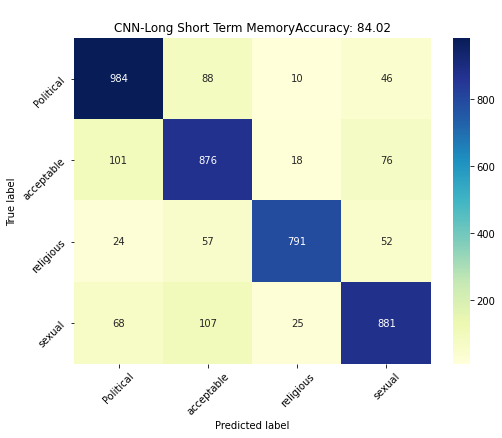

In [ ]:
conf_matrix(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_confusion_matrix")

,precision,recall,f1-score
Political,83.60,87.23,85.38
acceptable,77.66,81.79,79.67
religious,93.72,85.61,89.48
sexual,83.51,81.50,82.49
accuracy,84.02,84.02,84.02
macro avg,84.62,84.03,84.26
weighted avg,84.29,84.02,84.08


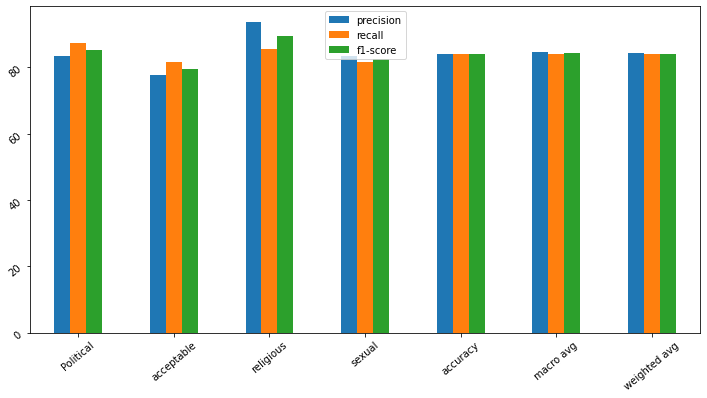

In [ ]:
C_LSTMreport=report_generate(y_pred,"CNN-Long Short Term Memory","C_LSTM","C_LSTM_report")
C_LSTMreport[1]